# BPL_TEST2_Batch - demo

In [1]:
run -i BPL_TEST2_Batch_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

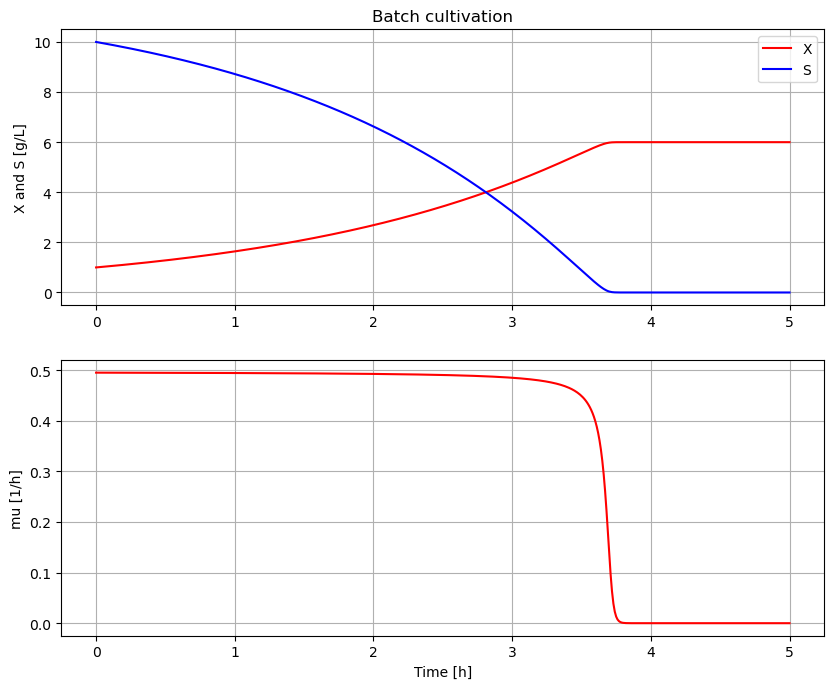

In [3]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu()

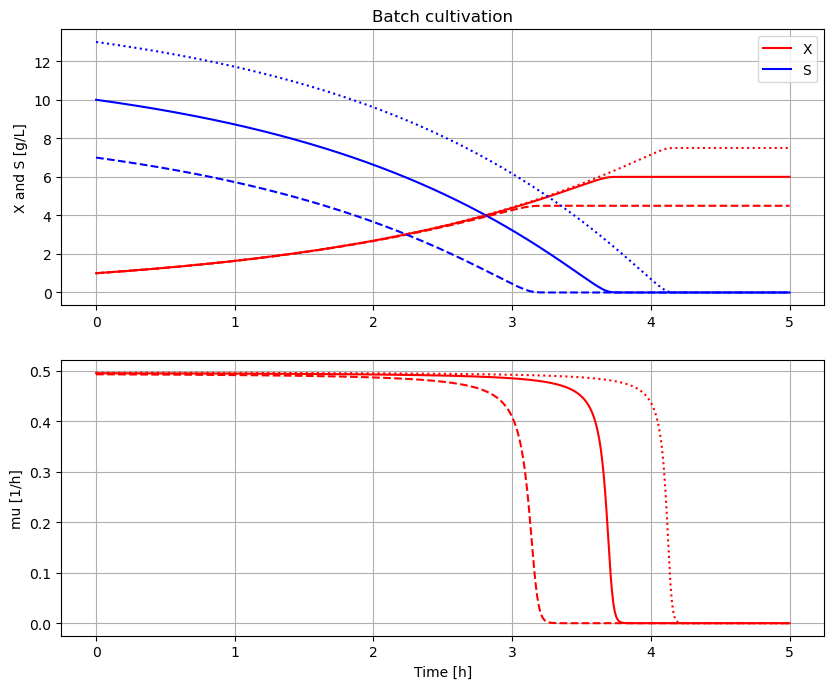

In [4]:
# Simulation were initial value of substrate VS_0 is varied
newplot(plotType='TimeSeries') 
for value in [10, 7, 13]: init(VS_0=value); simu(5)

# Restore default value of VS_0
init(VS_0=10)

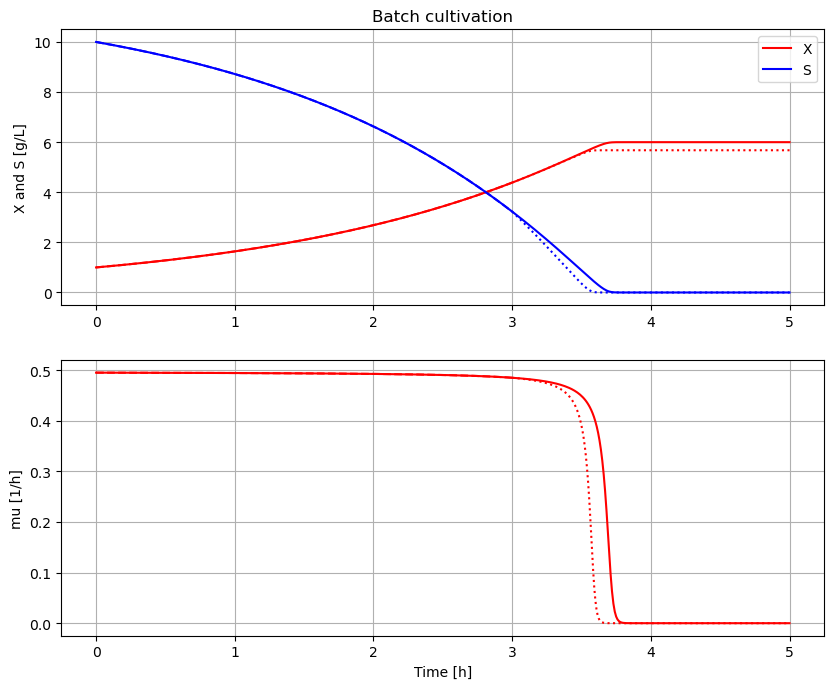

In [5]:
# Simulation where metabolism is changed after 3 hours
newplot(plotType='TimeSeries') 
simu(5)

simu(3)
par(Y=0.4, qSmax=1.0/(0.4/0.5)); simu(2, 'cont')

# Restore default value of Y and qSmax
par(Y=0.5, qSmax=1.0)

In [6]:
disp('culture')

Y : 0.4
qSmax : 1.25
Ks : 0.1


In [7]:
describe('mu')

Cell specific growth rate variable : 0.0 [ 1/h ]


In [8]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'liquidphase', 'MSL']


In [9]:
describe('MSL')

MSL: none


In [10]:
system_info()


System information
 -OS: Windows
 -Python: 3.10.6
 -Scipy: not installed in the notebook
 -PyFMI: 2.10.0
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL_TEST2.Batch
 -Generated: 2022-10-06T08:12:54
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.1.0
 -Interaction: FMU-explore version 0.9.6


In [11]:
stateDict

OrderedDict([('bioreactor.m[1]', 5.677064732120608),
             ('bioreactor.m[2]', 1.0844128844379897e-42),
             ('bioreactor.V', 1.0)])

In [13]:
model.get_states_list()

OrderedDict([('bioreactor.m[1]', <pyfmi.fmi.ScalarVariable2 at 0x254cbb5bf60>),
             ('bioreactor.m[2]', <pyfmi.fmi.ScalarVariable2 at 0x254cc254c20>),
             ('bioreactor.V', <pyfmi.fmi.ScalarVariable2 at 0x254cc2566b0>)])

In [14]:
stateDict['bioreactor.m[1]']

5.677064732120608

In [15]:
parDict

{'V_0': 1.0, 'VX_0': 1.0, 'VS_0': 10, 'Y': 0.5, 'qSmax': 1.0, 'Ks': 0.1}

In [16]:
parDict['V_0']

1.0

In [17]:
stateDict

OrderedDict([('bioreactor.m[1]', 5.677064732120608),
             ('bioreactor.m[2]', 1.0844128844379897e-42),
             ('bioreactor.V', 1.0)])